<a href="https://colab.research.google.com/github/Candida18/ADS_SMA/blob/main/SMA/10.%20Social%20Media%20Text%20Analytics%20model%20for%20improving%20existing%20product%20or%20service%20by%20analyzing%20customer's%20reviews%20or%20comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>Name: Candida Noronha<br/>
### <b>Class: BE COMPS B<br/>
### <b>Roll No.: 8960
### <b>Experiment 10 - Google Reviews Scraping & Sentiment Analysis

In [ ]:
# pip install google_play_scraper

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Using Google PLay Scraper to scrape Google Play Store reviews 
from google_play_scraper import app, Sort, reviews_all

In [ ]:
# Define and configure Google Play Scraper Library

# Nature's Basket - https://play.google.com/store/apps/details?id=com.godrej.naturesbasketltd&hl=en-US
naturesbkt_users_reviews = reviews_all(
    'com.godrej.naturesbasketltd',
    sleep_milliseconds=0,
    lang='en',
    country='us',
    sort=Sort.NEWEST,
)

In [ ]:
#Convert collected reviews data into dataframe

df_reviews = pd.DataFrame(np.array(naturesbkt_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))

#Display dataframe header
df_reviews = df_reviews.head(900)

In [ ]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              900 non-null    object        
 1   userName              900 non-null    object        
 2   userImage             900 non-null    object        
 3   content               900 non-null    object        
 4   score                 900 non-null    int64         
 5   thumbsUpCount         900 non-null    int64         
 6   reviewCreatedVersion  795 non-null    object        
 7   at                    900 non-null    datetime64[ns]
 8   replyContent          519 non-null    object        
 9   repliedAt             519 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 70.4+ KB


In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

1    324
5    270
2    120
3    103
4     83
Name: score, dtype: int64

<Axes: ylabel='score'>

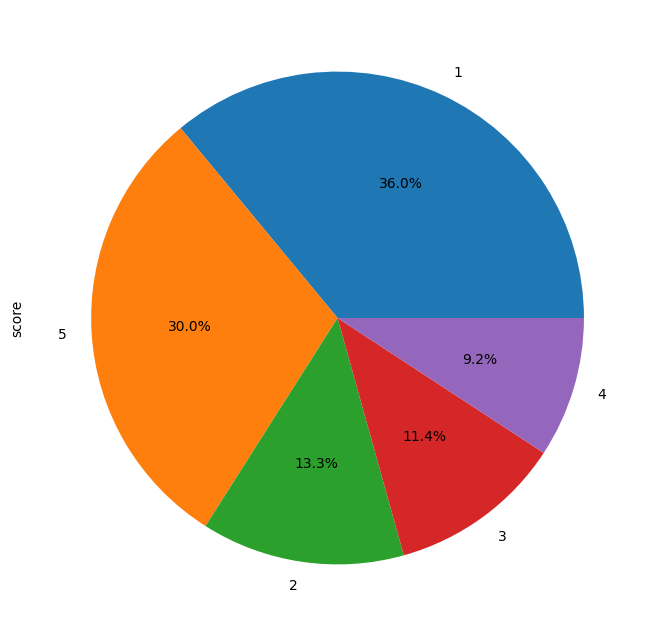

In [ ]:
# Visualise review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%')

In [ ]:
# Create new dataframe with review content and score for further analysis

df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [ ]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,"New update js very glitchy Also, they keep CAL...",1
1,(1) The link to Mangoes or to the Cart just gi...,1
2,Product display list stops abrupt after a cert...,4
3,What type of app is this? Otp hi nahi aata,2
4,Good,5


Using Azure Text Analytics API 

In [ ]:
# pip install azure-ai-textanalytics


In [ ]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [ ]:
# Define the service key and endpoint of Azure Text Analytics

key = "67d4b9aa56a045d890a4aeb1125ef3d1"
endpoint = "https://westus2.api.cognitive.microsoft.com/"

In [ ]:
# Configure Azure Text Analytics client library

ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(endpoint=endpoint,credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

#Pass review content to Azure Text Analytics and collect sentiment result

for index, headers in df_reviews_content.iterrows():
  reviews_content = str(headers['content'])
  print("Review Content : {}".format(reviews_content))

  documents = [reviews_content]
  response = text_analytics_client.analyze_sentiment(documents, language="en")[0]
 
  sentiment = response.sentiment
  print("Review Content Sentiment : {}".format(sentiment))
  reviews_score = str(headers['score'])
  print("Review Content Score : {}".format(reviews_score))
  print("\n")
  reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])


Review Content : New update js very glitchy Also, they keep CALLING me to see if I want anything. So annoying. I've asked them every time (dozens) to take me off their list and somehow they keep calling. Also, when you place an order, there's no guarantee that they HAVE the items. Very often, they're out of items.
Review Content Sentiment : negative
Review Content Score : 1


Review Content : (1) The link to Mangoes or to the Cart just gives a blank page. (2) The app does not check - at the beginning - whether my pincode is seviceable. If not, why should I spend a second more in the app. Nothing has changed since my last comment. Sham.
Review Content Sentiment : negative
Review Content Score : 1


Review Content : Product display list stops abrupt after a certain time.
Review Content Sentiment : negative
Review Content Score : 4


Review Content : What type of app is this? Otp hi nahi aata
Review Content Sentiment : neutral
Review Content Score : 2


Review Content : Good
Review Conten

In [ ]:
#Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

negative    435
positive    329
mixed        81
neutral      55
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

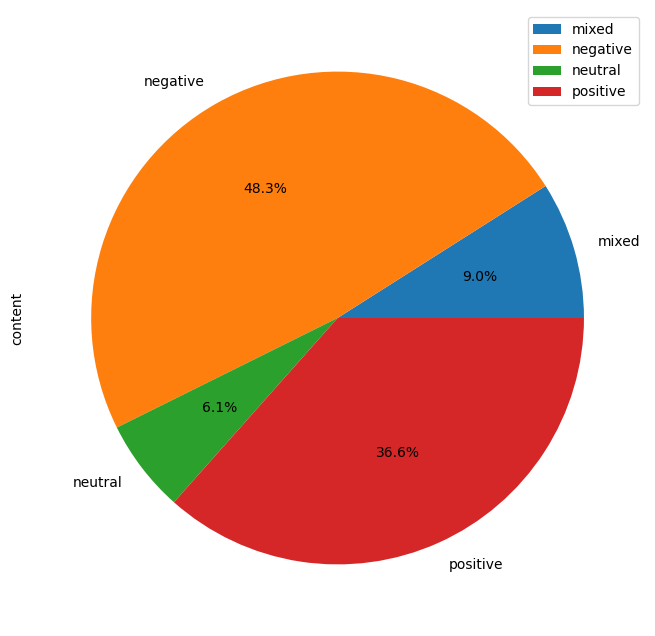

In [ ]:
#Visualise review content sentiment as pie chart
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie',y='content',figsize=(8,8),autopct="%1.1f%%")

In [ ]:
#Group by sentiment & reviews score

reviews_content_sentiment.groupby(["sentiment","reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 34
           2                 17
           3                 14
           4                 11
           5                  5
negative   1                263
           2                 90
           3                 62
           4                 15
           5                  5
neutral    1                 16
           2                  7
           3                 12
           4                  9
           5                 11
positive   1                 11
           2                  6
           3                 15
           4                 48
           5                249
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

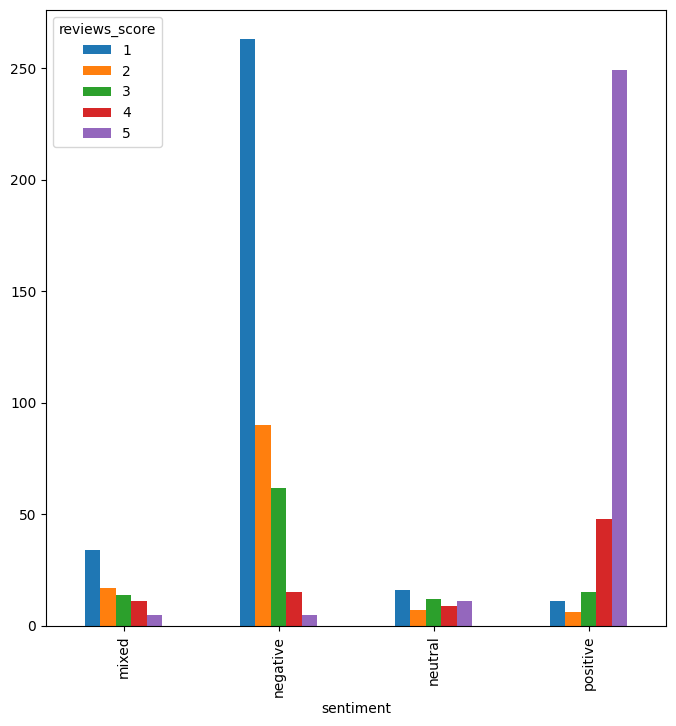

In [ ]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [ ]:
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        900 non-null    object
 1   sentiment      900 non-null    object
 2   reviews_score  900 non-null    object
dtypes: object(3)
memory usage: 21.2+ KB


In [ ]:
# create new dataframe to perform factorization

reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [ ]:
# perform factorization for sentiment col

reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [ ]:
# Convert reviews_score column data type to integer

reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [ ]:
# check dataframe information

reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        900 non-null    object
 1   sentiment      900 non-null    int64 
 2   reviews_score  900 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.2+ KB


In [ ]:
# Group by sentiment (factorised) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment","reviews_score"])["content"].count()

sentiment  reviews_score
0          1                263
           2                 90
           3                 62
           4                 15
           5                  5
1          1                 16
           2                  7
           3                 12
           4                  9
           5                 11
2          1                 11
           2                  6
           3                 15
           4                 48
           5                249
3          1                 34
           2                 17
           3                 14
           4                 11
           5                  5
Name: content, dtype: int64

<Axes: title={'center': 'Statistical Analysis by Sentiment Score and Review Score'}, xlabel='sentiment', ylabel='reviews_score'>

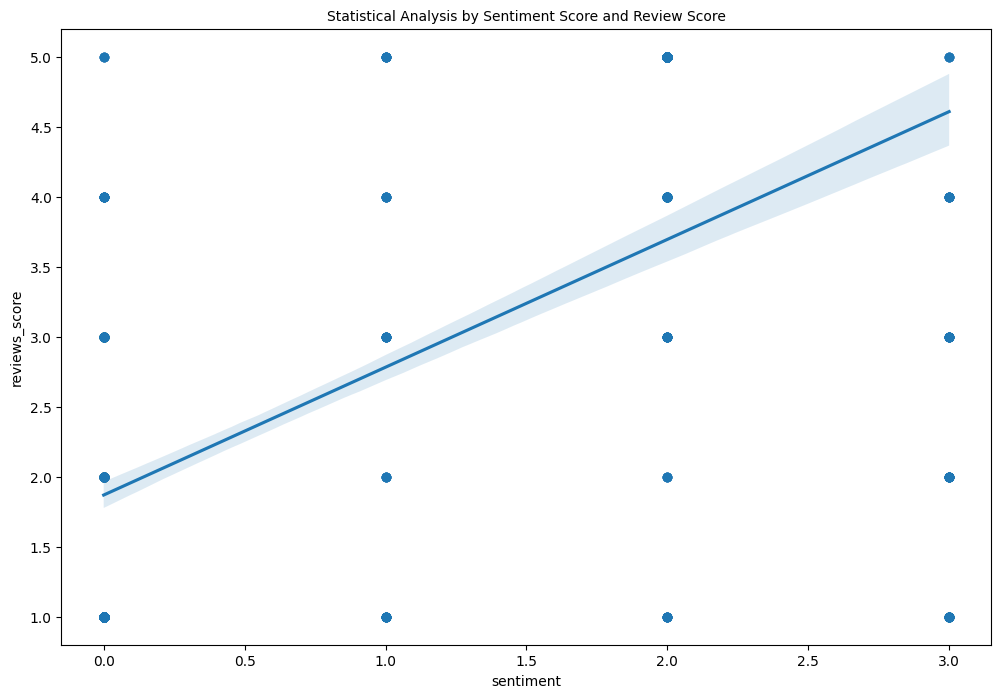

In [ ]:
# Plotting sentiment & reviews_score columns relationship using Seaborn

fig, ax = plt.subplots()
fig.set_size_inches(12,8)

plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y='reviews_score', data=reviews_content_sentiment_factorized)

{
  "key1": "67d4b9aa56a045d890a4aeb1125ef3d1",
  "key2": "a9fad421b45146ff9471f1feedbdde50"
}

References:
1. https://medium.com/analytics-vidhya/google-play-store-apps-reviews-scraping-and-text-analytics-sentiment-analysis-5303294fffa7
2. https://learn.microsoft.com/en-us/python/api/overview/azure/ai-textanalytics-readme?wt.md_id=searchAPI_azureportal_inproduct_rmskilling&sessionId=dfb102bf332f4402a9bcc2f78acabdef&view=azure-python
3. https://learn.microsoft.com/en-us/azure/cognitive-services/cognitive-services-apis-create-account-cli?tabs=windows&tryIt=true&source=docs#code-try-0